In [1]:
'''
BÚSQUEDA DE REGLAS DE ASOCIACIÓN PARA PREDECIR DIABETES

REPOSITORIO DATASET
*https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
OJO! hay que autenticarse
* https://github.com/LamaHamadeh/Pima-Indians-Diabetes-DataSet-UCI/blob/master/pima_indians_diabetes.txt
Agregar columnas
columnas = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
* Otra opción que no necesita agregar columnas:
"https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
Referencia acerca del dataset: https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/Pima%20Indians%20Diabetes%20Dataset.ipynb
Descripción
9 columnas: 2 con valores enteros, 7 con valores flotantes
Incluye varios elementos de diagnóstico y una columna que indica si padece diabetes o no
'''
#import requests
#import io
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [2]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

#r = requests.get(url).content
#data = pd.read_csv(io.StringIO(r.decode('utf-8')))
data=pd.read_csv(url)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
print(data.shape)
#print(data.head(10))
data.describe().T


(768, 9)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# Este método de pandas da mucha información interesante...
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

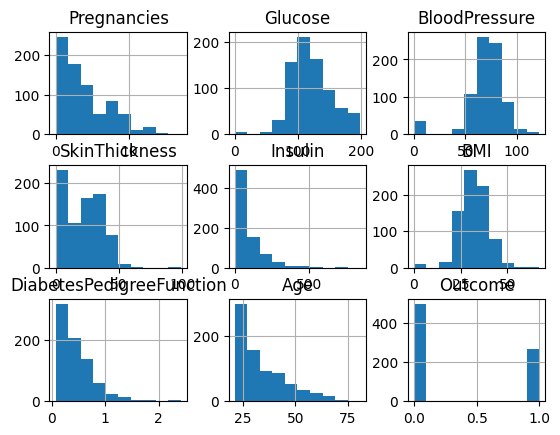

In [7]:
data.hist()

Outcome
0    500
1    268
dtype: int64


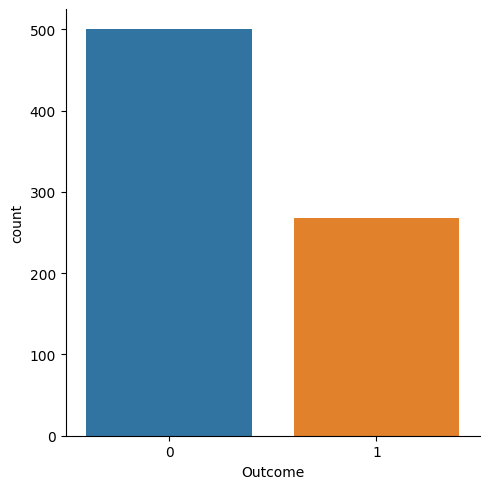

In [ ]:
# miramos si hay balance de clase a predecir
sns.catplot(x='Outcome', data = data, kind = 'count')
print(data.groupby('Outcome').size())


In [ ]:
#%%
# queremos saber si el dataframe tiene faltantes
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# vemos que tenemos datos de tipo numérico pero necesitamos etiquetarlos tipo onehot, es decir: 0 ó 1
# además, como tenemos valores que en una escala significan 'bien' o 'mal',
# tendremos que definir un umbral y reorganizar las variables en consecuencia
# supongamos que ese umbral es el valor medio (OJO!!!! esto es muy posible que no tenga ningún sentido médico)

data_ok = data.copy()
data_ok['Pregnancies_cat'] = np.where(data['Pregnancies'] < data['Pregnancies'].mean(), 0, 1)
data_ok['glucose_cat'] = np.where((data['Glucose'] < data['Glucose'].mean() ) & ((data['Glucose'] > data['Glucose'].mean() /2.)), 0, 1)
data_ok['BloodPressure_cat'] = np.where(data['BloodPressure'] < data['BloodPressure'].mean(), 0, 1)
data_ok['SkinThickness_cat'] = np.where(data['SkinThickness'] < data['SkinThickness'].mean(), 0, 1)
data_ok['Insulin_cat'] = np.where(data['Insulin'] < data['Insulin'].mean(), 0, 1)
data_ok['BMI_cat'] = np.where(data['BMI'] < data['BMI'].mean(), 0, 1)
data_ok['DiabetesPedigreeFunction_cat'] = np.where(data['DiabetesPedigreeFunction'] < data['DiabetesPedigreeFunction'].mean(), 0, 1)
data_ok['Age_cat'] = np.where(data['Age'] < data['Age'].mean(), 0, 1)
data_ok

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_cat,glucose_cat,BloodPressure_cat,SkinThickness_cat,Insulin_cat,BMI_cat,DiabetesPedigreeFunction_cat,Age_cat
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1,0,1,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0,0,0,1,0,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,1,0,0,0,0,1,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,1,1,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0,1,1,1,1,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0,1,1,1,0,1,0,0
765,5,121,72,23,112,26.2,0.245,30,0,1,1,1,1,1,0,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0,1,0,0,0,0,0,1


In [12]:
# eliminamos las columnas que no nos servirán
columnas_off = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data_ok.drop(columnas_off, axis = 1, inplace = True)
data_ok.head()

# listo el dataframe!!!

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Outcome,Pregnancies_cat,glucose_cat,BloodPressure_cat,SkinThickness_cat,Insulin_cat,BMI_cat,DiabetesPedigreeFunction_cat,Age_cat
0,1,1,1,1,1,0,1,1,1
1,0,0,0,0,1,0,0,0,0
2,1,1,1,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0
4,1,0,1,0,1,1,1,1,0


In [ ]:
data_ok

,Outcome,Pregnancies_cat,glucose_cat,BloodPressure_cat,SkinThickness_cat,Insulin_cat,BMI_cat,DiabetesPedigreeFunction_cat,Age_cat
0,1,1,1,1,1,0,1,1,1
1,0,0,0,0,1,0,0,0,0
2,1,1,1,0,0,0,0,1,0
3,0,0,0,0,1,1,0,0,0
4,1,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...
763,0,1,0,1,1,1,1,0,1
764,0,0,1,1,1,0,1,0,0
765,0,1,1,1,1,1,0,0,0
766,1,0,1,0,0,0,0,0,1


In [18]:
# ahora vemos cómo plantear las reglas. Tenemos que hacer que busque asociaciones que coincidan con la presencia de diabetes.
# Entonces, ésta será el consecuente
# Calculamos todas las asociaciones presentes
diabetes = data_ok.loc[data_ok['Outcome']==1]   # nos quedamos sólo con los registros que corresponden a diabéticos
diabetes.drop(['Outcome'], inplace=True, axis=1)
print(diabetes.shape)
diabetes

(268, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-f3928043d483>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes.drop(['Outcome'], inplace=True, axis=1)


,Pregnancies_cat,glucose_cat,BloodPressure_cat,SkinThickness_cat,Insulin_cat,BMI_cat,DiabetesPedigreeFunction_cat,Age_cat
0,1,1,1,1,0,1,1,1
2,1,1,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0
6,0,0,0,1,1,0,0,0
8,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...
755,0,1,1,1,1,1,1,1
757,0,1,1,0,0,1,0,1
759,1,1,1,0,0,1,0,1
761,1,1,1,1,0,1,0,1


In [19]:
frequent_items = apriori(diabetes, use_colnames=True)
#print(frequent_items.head())
print(frequent_items.shape)
frequent_items

(8, 2)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.578358,(Pregnancies_cat)
1,0.735075,(glucose_cat)
2,0.679104,(BloodPressure_cat)
3,0.608209,(SkinThickness_cat)
4,0.686567,(BMI_cat)
5,0.544776,(Age_cat)
6,0.511194,"(BloodPressure_cat, glucose_cat)"
7,0.522388,"(BMI_cat, glucose_cat)"


In [22]:
reglas = association_rules(frequent_items, metric = 'lift')
#print(reglas.head())
print(reglas.shape)
print('TODAS LAS ASOCIACIONES ENCONTRADAS')
reglas.sort_values(['support'], ascending=False).reset_index(drop=True)


(4, 10)
TODAS LAS ASOCIACIONES ENCONTRADAS


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BMI_cat),(glucose_cat),0.686567,0.735075,0.522388,0.760870,1.035092,0.017710,1.107870,0.108163
1,(glucose_cat),(BMI_cat),0.735075,0.686567,0.522388,0.710660,1.035092,0.017710,1.083268,0.127968
2,(BloodPressure_cat),(glucose_cat),0.679104,0.735075,0.511194,0.752747,1.024042,0.012002,1.071476,0.073162
3,(glucose_cat),(BloodPressure_cat),0.735075,0.679104,0.511194,0.695431,1.024042,0.012002,1.053607,0.088619
